# Sampling from a distribution defined by a custom probability density funtion $f$
Computers generally offer by default the random function
that samples from a uniform distribution in the interval [0,1]

one can use the Python answer to R called *scipy.stats* and generate a custom distribution of a random variable

```
from scipy.stats import rv_continous

```

In [6]:
from scipy.stats import rv_continuous
rv_continuous?

Or you can write it on your own. The trick  is called **inverse CDF**

<img src="figures/inverse-cdf.png" width="50%">

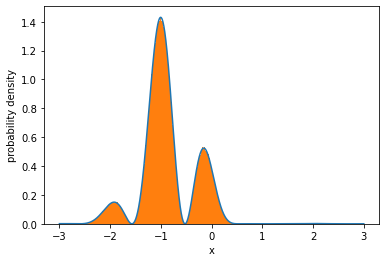

In [10]:
# %load randomsampling.py
import numpy as np
from numpy.random import random
from scipy import interpolate
import matplotlib.pyplot as plt

def f(x):
    # does not need to be normalized
    return np.exp(-x**2) * np.cos(3*x)**2 * (x-1)**4/np.cosh(1*x)

def sample(g):
    x = np.linspace(-5,5,int(1e5))
    y = g(x)                        # probability density function, pdf
    cdf_y = np.cumsum(y)            # cumulative distribution function, cdf
    cdf_y = cdf_y/cdf_y.max()       # takes care of normalizing cdf to 1.0
    inverse_cdf = interpolate.interp1d(cdf_y,x)    # this is a function
    return inverse_cdf

def return_samples(N=int(1e6)):
    # let's generate some samples according to the chosen pdf, f(x)
    uniform_samples = random(int(N))
    required_samples = sample(f)(uniform_samples)
    return required_samples

x = np.linspace(-3,3,int(1e4))
fig,ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('probability density')
ax.plot(x,f(x)/np.sum(f(x)*(x[1]-x[0])) )
ax.hist(return_samples(1e6),bins='auto',density=True,range=(x.min(),x.max()))
plt.show() 